### Assignment 1: projections
- Download the shapefile of world's countries from here: https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=Europe%2FBerlin

- Download a shapefile of world's urban areas: https://geo.nyu.edu/catalog/stanford-yk247bg4748

While you can download the files and add them in your working directory manually, it is recommended you load them as geopandas data frames from their url's. The addresses for each file are shown below:

In [1]:
#RUN YOUR CODE HERE
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Download and extract the shapefile of world's countries using geopandas
#url for countries
url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=Europe%2FBerlin'
wct = gpd.read_file(url)

# Download and extract the shapefile of urban areas
#url for cities
url = 'https://stacks.stanford.edu/file/druid:yk247bg4748/data.zip'
wurb = gpd.read_file(url)
print(wurb.head())

   name_conve  max_pop_al  max_pop_20  max_pop_50  max_pop_30  max_pop_31  \
0     Aalborg    101616.0    101616.0         0.0         0.0         0.0   
1      Aarhus    227100.0    227100.0         0.0         0.0         0.0   
2         Aba    851210.0    851210.0         0.0         0.0         0.0   
3      Abadan    260078.0    260078.0         0.0         0.0         0.0   
4  Abaetetuba     79420.0     79420.0         0.0         0.0         0.0   

   max_natsca  min_areakm  max_areakm  min_areami  ...  max_bb_xmi  \
0        20.0        76.0        76.0        29.0  ...    9.850000   
1        20.0       131.0       131.0        51.0  ...   10.058333   
2        20.0       278.0       278.0       108.0  ...    7.233333   
3        20.0        44.0        44.0        17.0  ...   48.233333   
4        20.0        10.0        10.0         4.0  ...  -48.891667   

   min_bb_xma  max_bb_xma  min_bb_ymi  max_bb_ymi  min_bb_yma  max_bb_yma  \
0   10.033333   10.033333   56.983333  

1) What is the coordinate system of these 2 geodaframes? Use the pyproj library to print the information

In [30]:
#RUN YOUR CODE HERE

import pyproj
# Get the CRS as a pyproj.CRS object
crs_wct = pyproj.CRS(wct.crs)

# Print the properties of the CRS
crs_wct

# Get the CRS as a pyproj.CRS object
crs_wurb = pyproj.CRS(wurb.crs)

# Print the properties of the CRS
crs_wurb


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

2) Reproject these two files in a new coordinate system with an EPSG value of 3857.

In [32]:
#RUN YOUR CODE HERE
# Reproject the geopandas dataframes to EPSG 3857
wct_epsg_3857 = wct.to_crs("EPSG:3857")

wurb_epsg_3857 = wurb.to_crs("EPSG:3857")

3) What is their coordinate system now? Use pyproj again to print the reprojected system.

In [35]:
wurb_epsg_3857.crs
wct_epsg_3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

4) Plot the two files.

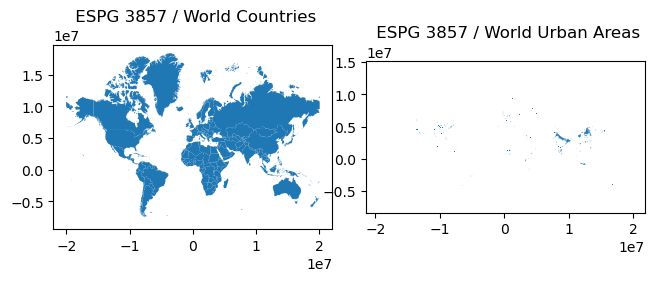

In [47]:
# Subplots
figure, (fig1, fig2) = plt.subplots(nrows = 1, ncols =2)

# World Countries
wct_epsg_3857.plot(ax=fig1)
fig1.set_title(" ESPG 3857 / World Countries")
fig1.set_aspect(1)

# World urban areas
wurb_epsg_3857.plot(ax=fig2)
fig2.set_title(" ESPG 3857 / World Urban Areas")
fig2.set_aspect(1)

# Layerout
plt.tight_layout()


5) Save the GeoDataFrames to a a gpkg file

In [48]:
# Write to GeoPackage
wct_epsg_3857.to_file('wct_epsg_3857.gpkg', driver='GPKG')
wurb_epsg_3857.to_file('wurb_epsg_3857.gpkg', driver='GPKG')

Good job! Now, you can move on to the next part!